In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#loading dataset
url='/home/umar/ML-AI/datasets/heart.csv'
dataset=pd.read_csv(url,header=0)
print("Shape of dataset is:",dataset.shape)

Shape of dataset is: (303, 14)


In [4]:
#class distribution - 0=low risk of heart attck,1=high risk , feature sets=13
dataset.groupby('target').size()

target
0    138
1    165
dtype: int64

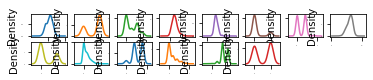

In [5]:
#Unimodal data visualisation
# density distribution graph
dataset.plot(kind='density',subplots=True,layout=(8,8),sharex=False,legend=False,fontsize=1)
pyplot.show()

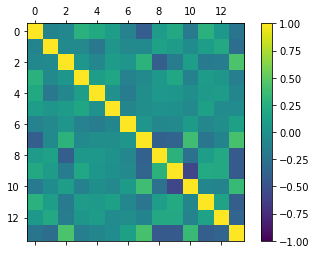

In [6]:
#multimodal data visualisation
#corelation matrix 
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [7]:
#splitting dataset into testing and training
array=dataset.values
X=array[:,0:13] #all the rows, only 0 to 13th colomn for features
Y=array[:,13] # all the rows, only the 14th column of target
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.20,random_state=7)

In [8]:
#spot-check
models=[]
models.append(('LR',LogisticRegression(solver='sag',max_iter=5000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [9]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR 0.867333 (0.084745)
LDA 0.854667 (0.091887)
KNN 0.639833 (0.104348)
CART 0.785167 (0.092696)
NB 0.826167 (0.103835)
SVM 0.640167 (0.113153)


/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


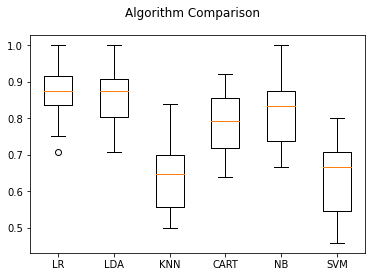

In [10]:
#algorithm comparison
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [11]:
#standardising the data and then training-
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression(solver='sag',max_iter=5000))])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))

results = []
names = []
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)


/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR 0.867333 (0.084745)
LDA 0.854667 (0.091887)
KNN 0.639833 (0.104348)
CART 0.797500 (0.098931)
NB 0.826167 (0.103835)
SVM 0.640167 (0.113153)


/home/umar/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


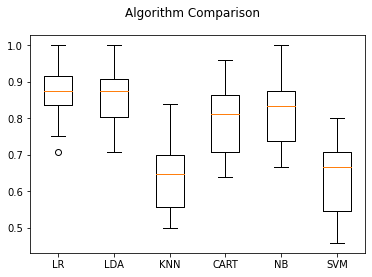

In [12]:
#algorithm comparison after using standardised data
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [13]:
#finalising the model using LDA since LR is giving convergenceError
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=LinearDiscriminantAnalysis()
model.fit(rescaledX,Y_train)

#estimating accuracy
rescaledvalidationX=scaler.fit_transform(X_validation)
predictions=model.predict(rescaledvalidationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.7377049180327869
[[18 12]
 [ 4 27]]
              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69        30
         1.0       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [14]:
#Tuning LDA
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid = dict()
param_grid['solver'] = ['svd', 'lsqr', 'eigen']
model=LinearDiscriminantAnalysis()
kfold=KFold(n_splits=10)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: 0.854667 using {'solver': 'svd'}
